In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [143]:
from sklearn.preprocessing import MinMaxScaler
scPt=MinMaxScaler(feature_range=(0,1))
scEta=MinMaxScaler(feature_range=(0,1))
scPhi=MinMaxScaler(feature_range=(0,1))
data=pd.read_csv("SMSimulation_500000.csv")
df=pd.DataFrame(data)
nTracks=df['nTracks'].to_numpy()
nEvents=df['Nevents'].to_numpy()
pt=df["trackPt"].to_numpy()
eta=df["trackEta"].to_numpy()
phi=df["trackPhi"].to_numpy()
phi=phi+np.pi
b=16 #tracks per event
c=3 #Variables 
input_train=[]
input_test=[]
cuentatrain=0
cuentatest=0
totPt=[]
totEta=[]
totPhi=[] 
pttest=[]
Etatest=[]
Phitest=[]
for i in range(len(nEvents)-1): #I check the nEvents list and when I pass from one event to the following I keep the data
    d=int(nEvents[i])
    if int(nEvents[i+1])!=d:
        a=int(nTracks[i])
        if a>=b: #If the number of tracks is bigger than cutoof I take the event
            pteventos=[]
            Etaeventos=[]
            Phieventos=[]

    
            Rij=np.ones([c,b])
            pteventos=np.array(pt[i-a+1:i+1]) #I take the data of the event
            Etaeventos=np.array(eta[i-a+1:i+1])
            Phieventos=np.array(phi[i-a+1:i+1])
            
            ptML=[]
            EtaML=[]
            PhiML=[]
            
            for j in range(b): #Now we are going to the take the highest pt tracks
                ptML.append(max(pteventos));indice=np.argmax(pteventos) #I take the maximun and its argument
                EtaML.append(Etaeventos[indice])
                PhiML.append(Phieventos[indice])
                pteventos=np.delete(pteventos,indice) #I delete the maximum and do it again
                Etaeventos=np.delete(Etaeventos,indice)
                Phieventos=np.delete(Phieventos,indice)
                
            
            
        
        
            ptML=np.array(ptML).reshape(-1,1);#ptML=scPt.fit_transform(ptML) #I take all the elements as [],[],[] and then do the
            EtaML=np.array(EtaML).reshape(-1,1);#EtaML=scEta.fit_transform(EtaML) #normalisation
            PhiML=np.array(PhiML).reshape(-1,1);#PhiML=scPhi.fit_transform(PhiML)


        
        
            
            
            
            for k in range(b): #I associate the matrix all the normalised data
                Rij[0,k]=ptML[k][0]
                Rij[1,k]=EtaML[k][0]
                Rij[2,k]=PhiML[k][0]
                
            if cuentatrain >= 94000: #This is the number of train events I am choosing
                for l in range(b):
                    input_test.append(Rij)
                    #pttest.append(pteventos[l][0])
                    #pztest.append(pzeventos[l][0])
                    #Etest.append(Eeventos[l][0])
                    #Phitest.append(Phieventos[l][0])
                    pttest.append(ptML[l][0])
                    Etatest.append(EtaML[l][0])
                    Phitest.append(PhiML[l][0])
                cuentatest+=1
            else:
                for l in range(b):
                    #totPt.append(pteventos[l][0])
                    #totPz.append(pzeventos[l][0])
                    #totE.append(Eeventos[l][0])
                    #totPhi.append(Phieventos[l][0])
                    totPt.append(ptML[l][0])
                    totEta.append(EtaML[l][0])
                    totPhi.append(PhiML[l][0])
                input_train.append(Rij)
                cuentatrain+=1
                
deftrain=np.ones([cuentatrain,c,b]) #I define the tensor which will keep the data for the train
deftest=np.ones([cuentatest,c,b]) #Same for test
for i in range(cuentatrain):
    for j in range(c):
        for k in range(b):
            deftrain[i,j,k]=input_train[i][j,k]

for i in range(cuentatest):
    for j in range(c):
        for k in range(b):
            deftest[i,j,k]=input_test[i][j,k]
            
            

In [156]:
cuentatest

9663

In [145]:
#Now we follow the same strategy with SUEPs
from sklearn.preprocessing import MinMaxScaler
scPtSUEP=MinMaxScaler(feature_range=(0,1))
scEtaSUEP=MinMaxScaler(feature_range=(0,1))
scPhiSUEP=MinMaxScaler(feature_range=(0,1))
dataSUEP=pd.read_csv("SUEP_Simulation100000.csv")
dfSUEP=pd.DataFrame(data)
nTracksSUEP=dfSUEP['nTracks'].to_numpy()
nEventsSUEP=dfSUEP['Nevents'].to_numpy()
ptSUEP=dfSUEP["trackPt"].to_numpy()
etaSUEP=dfSUEP["trackEta"].to_numpy()
phiSUEP=dfSUEP["trackPhi"].to_numpy()
phiSUEP= phiSUEP + np.pi
b=16 #tracks per event
c=3 #variables we are working with
input_trainSUEP=[]
input_testSUEP=[]
cuentatrainSUEP=0
cuentatestSUEP=0
totPtSUEP=[]
totEtaSUEP=[]
totPhiSUEP=[] 
pttestSUEP=[]
EtatestSUEP=[]
PhitestSUEP=[]
for i in range(len(nEventsSUEP)-1):
    d=int(nEventsSUEP[i])
    if int(nEventsSUEP[i+1])!=d:
        a=int(nTracksSUEP[i])
        if a>=b:
            pteventosSUEP=[]
            EtaeventosSUEP=[]
            PhieventosSUEP=[]

    
            RijSUEP=np.ones([c,b])
            pteventosSUEP=np.array(ptSUEP[i-a+1:i+1])
            EtaeventosSUEP=np.array(etaSUEP[i-a+1:i+1])
            PhieventosSUEP=np.array(phiSUEP[i-a+1:i+1])
            
            ptMLSUEP=[]
            EtaMLSUEP=[]
            PhiMLSUEP=[]
            
            for j in range(b):
                ptMLSUEP.append(max(pteventosSUEP));indice=np.argmax(pteventosSUEP)
                EtaMLSUEP.append(EtaeventosSUEP[indice])
                PhiMLSUEP.append(PhieventosSUEP[indice])
                pteventosSUEP=np.delete(pteventosSUEP,indice)
                EtaeventosSUEP=np.delete(EtaeventosSUEP,indice)
                PhieventosSUEP=np.delete(PhieventosSUEP,indice)
                
        
            ptMLSUEP=np.array(ptMLSUEP).reshape(-1,1);ptMLSUEP=scPtSUEP.fit_transform(ptMLSUEP)
            EtaMLSUEP=np.array(EtaMLSUEP).reshape(-1,1);EtaMLSUEP=scEtaSUEP.fit_transform(EtaMLSUEP)
            PhiMLSUEP=np.array(PhiMLSUEP).reshape(-1,1);PhiMLSUEP=scPhiSUEP.fit_transform(PhiMLSUEP)


        
        
            
            
            
            for k in range(b):
                RijSUEP[0,k]=ptMLSUEP[k][0]
                RijSUEP[1,k]=EtaMLSUEP[k][0]
                RijSUEP[2,k]=PhiMLSUEP[k][0]
                
            if cuentatrainSUEP >= 90000:
                for l in range(b):
                    pttestSUEP.append(ptMLSUEP[l][0])
                    EtatestSUEP.append(EtaMLSUEP[l][0])
                    PhitestSUEP.append(PhiMLSUEP[l][0])
                input_testSUEP.append(RijSUEP)    
                cuentatestSUEP+=1
            else:
                for l in range(b):
                    totPtSUEP.append(ptMLSUEP[l][0])
                    totEtaSUEP.append(EtaMLSUEP[l][0])
                    totPhiSUEP.append(PhiMLSUEP[l][0])
                input_trainSUEP.append(RijSUEP)
                cuentatrainSUEP+=1
                
deftrainSUEP=np.ones([cuentatrainSUEP,c,b])
deftestSUEP=np.ones([cuentatestSUEP,c,b])
for i in range(cuentatrainSUEP):
    for j in range(c):
        for k in range(b):
            deftrainSUEP[i,j,k]=input_trainSUEP[i][j,k]

for i in range(cuentatestSUEP):
    for j in range(c):
        for k in range(b):
            deftestSUEP[i,j,k]=input_testSUEP[i][j,k]
            
    

90000

In [146]:
#Now we define AE. We follow the structure from SUEP Paper (5 layers, we descend from 48 to 10 bottlneck and then return
#simetrically to the beginning, leakyrelu with -0.2 as activation functions)

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(40, activation=layers.LeakyReLU(alpha=0.2)),
      layers.Dense(20, activation=layers.LeakyReLU(alpha=0.2)),
      layers.Dense(10, activation=layers.LeakyReLU(alpha=0.2))      
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(20, activation=layers.LeakyReLU(alpha=0.2)),
      layers.Dense(40, activation=layers.LeakyReLU(alpha=0.2)),  
      layers.Dense(48, activation='relu'),
      layers.Reshape((3, 16))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [147]:
#This cell of for building the loss function we are using as the anomaly score
#I still don't know how to implement this custom loss function

def custom_loss_function(y_true, y_pred):
    def sigmaf(y_pred):
        sigma=1./(1.+np.exp(-y_pred))
        return sigma
    difference=np.abs(y_pred-sigmaf(y_true))**3/np.abs(sigmaf(y_true))**0
    error=tensorflow.reduce_mean(difference,axis=-1)
    return error

def patata():
    def patata2(y_true,y_predict):
        return custom_loss_function(y_true, y_pred)
    return patata2

In [148]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError()) #I compile the AE

In [149]:
autoencoder.fit(deftrain, deftrain, #I run it usinf the trainset as input data
                epochs=5, batch_size=64,
                shuffle=True,
                validation_data=(deftest, deftest))

Epoch 1/5
1469/1469 [==============================] - 3s 2ms/step - loss: 1.9394 - val_loss: 1.2965
Epoch 2/5
1469/1469 [==============================] - 2s 1ms/step - loss: 1.1359 - val_loss: 1.0787
Epoch 3/5
1469/1469 [==============================] - 2s 2ms/step - loss: 0.9975 - val_loss: 0.8878
Epoch 4/5
1469/1469 [==============================] - 2s 2ms/step - loss: 0.8762 - val_loss: 0.8859
Epoch 5/5
1469/1469 [==============================] - 2s 2ms/step - loss: 0.8752 - val_loss: 0.8848


302/302 [==============================] - 0s 862us/step


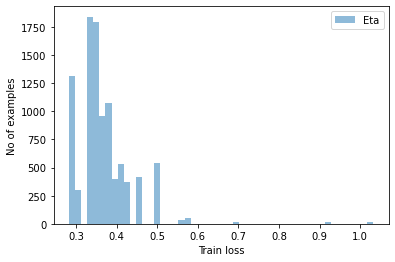

In [150]:
#Here we can see the reconstruction lost for some variables (the one from MSE)

reconstructionstest = autoencoder.predict(deftest)
test_loss = tf.keras.losses.mae(reconstructionstest, deftest)
test_array= test_loss.numpy()
plt.hist(test_array[:,1], bins=50,alpha=0.5,label='Eta')
#plt.hist(test_array[:,2], bins=50,alpha=0.5,label='Phi')
plt.legend(loc='best')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.savefig
plt.show()

In [151]:
# #Here i turn test and reconstruction data as array and do some comparison plots with the data

totaepttest=[] #AE reconstruction
totaeEtest=[]
totaePhitest=[]

for i in range(cuentatest):
    for k in range(b):
        totaepttest.append(float(reconstructionstest[i][0][k]))
        totaeEtest.append(float(reconstructionstest[i][1][k]))
        totaePhitest.append(float(reconstructionstest[i][2][k]))
        
totpttest=[] #Test data raw
totEtest=[]
totPhitest=[]

for i in range(cuentatest):
    for k in range(b):
        totpttest.append(float(deftest[i][0][k]))
        totEtest.append(float(deftest[i][1][k]))
        totPhitest.append(float(deftest[i][2][k]))        


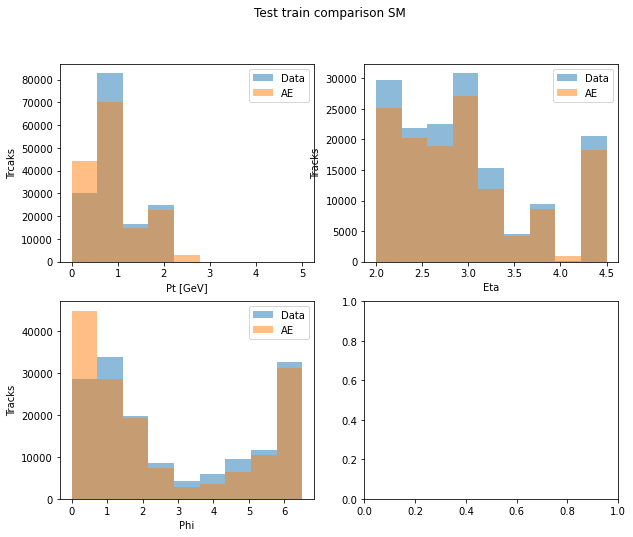

In [157]:
# now let's make some comparison plots
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,2,sharey=False,figsize=(10,8))

fig.suptitle('Test train comparison SM')


bins = np.linspace(0,5,10)
axs[0,0].hist(totpttest, bins, alpha=0.5, label='Data')
axs[0,0].hist(totaepttest, bins, alpha=0.5, label='AE')
axs[0,0].legend(loc='upper right')
axs[0,0].set_ylabel("Trcaks")
axs[0,0].set_xlabel("Pt [GeV]")

bins = np.linspace(2,4.5,10)
axs[0,1].hist(totEtest, bins, alpha=0.5, label='Data')
axs[0,1].hist(totaeEtest, bins, alpha=0.5, label='AE')
axs[0,1].legend(loc='upper right')
axs[0,1].set_ylabel("Tracks")
axs[0,1].set_xlabel("Eta")

bins = np.linspace(0,6.5,10)
axs[1,0].hist(totPhitest, bins, alpha=0.5, label='Data')
axs[1,0].hist(totaePhitest, bins, alpha=0.5, label='AE')
axs[1,0].legend(loc='upper right')
axs[1,0].set_ylabel("Tracks")
axs[1,0].set_xlabel("Phi")



plt.savefig('Comparison_Data_Test_AE.png',dpi=300)


In [154]:
reconstructions_SUEP = autoencoder.predict(deftestSUEP)
train_loss_SUEP = tf.keras.losses.mae(reconstructions_SUEP, deftestSUEP)
train_SUEP_array= train_loss_SUEP.numpy()

427/427 [==============================] - 0s 914us/step


In [126]:
#Same for SUEPs
totaepttestS=[]
totaeEtestS=[]
totaePhitestS=[]

for i in range(cuentatestSUEP):
    for k in range(b):
        totaepttestS.append(float(reconstructions_SUEP[i][0][k]))
        totaeEtestS.append(float(reconstructions_SUEP[i][1][k]))
        totaePhitestS.append(float(reconstructions_SUEP[i][2][k]))
        
totpttestS=[]
totEtestS=[]
totPhitestS=[]

for i in range(cuentatestSUEP):
    for k in range(b):
        totpttestS.append(float(deftestSUEP[i][0][k]))
        totEtestS.append(float(deftestSUEP[i][1][k]))
        totPhitestS.append(float(deftestSUEP[i][2][k]))        


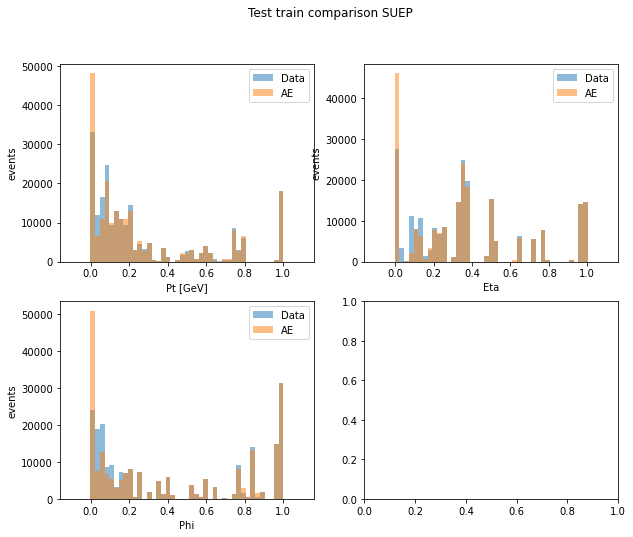

In [127]:
# now let's make some comparison plots
import matplotlib.pyplot as plt
import numpy as np

del fig 
fig, axs = plt.subplots(2,2,sharey=False,figsize=(10,8))

fig.suptitle('Test train comparison SUEP')


bins = np.linspace(-0.1,1.1,50)
axs[0,0].hist(totpttestS, bins, alpha=0.5, label='Data')
axs[0,0].hist(totaepttestS, bins, alpha=0.5, label='AE')
axs[0,0].legend(loc='upper right')
axs[0,0].set_ylabel("events")
axs[0,0].set_xlabel("Pt [GeV]")


axs[0,1].hist(totEtestS, bins, alpha=0.5, label='Data')
axs[0,1].hist(totaeEtestS, bins, alpha=0.5, label='AE')
axs[0,1].legend(loc='upper right')
axs[0,1].set_ylabel("events")
axs[0,1].set_xlabel("Eta")


axs[1,0].hist(totPhitestS, bins, alpha=0.5, label='Data')
axs[1,0].hist(totaePhitestS, bins, alpha=0.5, label='AE')
axs[1,0].legend(loc='upper right')
axs[1,0].set_ylabel("events")
axs[1,0].set_xlabel("Phi")



plt.savefig('Comparison_SUEP_Test_AE.png',dpi=300)

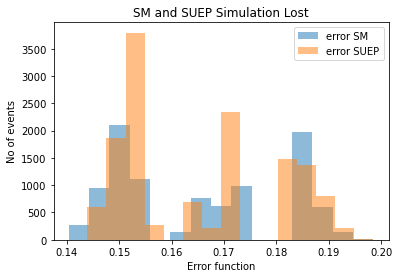

In [62]:
#No we apply the reconstruction lost from SUEP paper 

def sigma(a):
        sigma=1./(1.+np.exp(-a))
        return sigma

errorevent=[]
for i in range(cuentatest):
    suma=0
    for j in range(c):
        for k in range(b):
            numerador=np.abs(reconstructionstest[i,j,k]-sigma(deftest[i,j,k]))**3
            suma+=numerador
    error=suma/b
    errorevent.append(error)
    
erroreventSUEP=[]
for i in range(cuentatestSUEP):
    suma=0
    for j in range(c):
        for k in range(b):
            numerador=np.abs(reconstructions_SUEP[i,j,k]-sigma(deftestSUEP[i,j,k]))**3
            suma+=numerador
    errorSUEP=suma/b
    erroreventSUEP.append(errorSUEP)

plt.hist(errorevent, bins=15,alpha=0.5,label='error SM')
plt.hist(erroreventSUEP, bins=15,alpha=0.5,label='error SUEP')
plt.title('SM and SUEP Simulation Lost')
plt.xlabel("Error function")
plt.ylabel("No of events")
plt.legend(loc='best')
plt.savefig('Loss_SM_SUEP.png', dpi=400)
plt.show()    


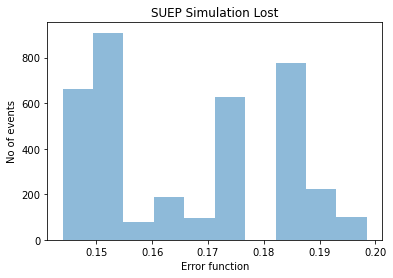

In [50]:
erroreventSUEP=[]
for i in range(cuentatestSUEP):
    suma=0
    for j in range(c):
        for k in range(b):
            numerador=np.abs(reconstructions_SUEP[i,j,k]-sigma(deftrainSUEP[i,j,k]))**3
            suma+=numerador
    errorSUEP=suma/b
    erroreventSUEP.append(errorSUEP)

plt.hist(errorevent, bins=10,alpha=0.5,label='error')
plt.title('SUEP Simulation Lost')
plt.xlabel("Error function")
plt.ylabel("No of events")
plt.show()

3125/3125 [==============================] - 3s 914us/step


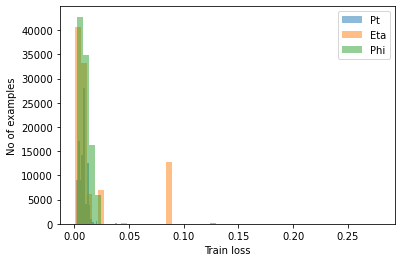

In [37]:
reconstructions_SUEP = autoencoder.predict(deftrainSUEP)
train_loss_SUEP = tf.keras.losses.mae(reconstructions_SUEP, deftrainSUEP)
train_SUEP_array= train_loss_SUEP.numpy()
plt.hist(train_SUEP_array[:,0] ,bins=50,alpha=0.5,label='Pt')
plt.hist(train_SUEP_array[:,1], bins=50,alpha=0.5,label='Eta')
#plt.hist(train_SUEP_array[:,2], bins=50,alpha=0.5,label='Phi')
plt.legend(loc='best')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [22]:
test_array= test_loss.numpy()
for i in range(cuentates):
    for j in range(c):
        sigmasuma=0
        for k in range(b):
            sigma=1./(1.+np.exp(-y_pred))

<tf.Tensor: shape=(94000,), dtype=float64, numpy=
array([0.0043447 , 0.00934008, 0.00934008, ..., 0.00720565, 0.01176187,
       0.00908606])>

In [46]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(3, 16, 1)),
      layers.Conv2D(16, (3, 3),strides=(1,2), activation='tanh', padding='same'),
      layers.Conv2D(32, (3, 3), strides=(1,2), activation='tanh', padding='same')])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(32, kernel_size=3, strides=(1,2), activation='tanh', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=(1,2), activation='tanh', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [47]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [48]:
autoencoder.fit(deftrain, deftrain,
                epochs=5, batch_size=64,
                shuffle=True,
                validation_data=(deftest, deftest))

Epoch 1/5
5875/5875 [==============================] - 19s 3ms/step - loss: 0.1262 - val_loss: 0.1241
Epoch 2/5
5875/5875 [==============================] - 19s 3ms/step - loss: 0.1245 - val_loss: 0.1240
Epoch 3/5
5875/5875 [==============================] - 19s 3ms/step - loss: 0.1245 - val_loss: 0.1240
Epoch 4/5
5875/5875 [==============================] - 19s 3ms/step - loss: 0.1245 - val_loss: 0.1240
Epoch 5/5
5875/5875 [==============================] - 19s 3ms/step - loss: 0.1245 - val_loss: 0.1240


In [45]:
reconstructions = autoencoder.predict(deftest)
train_loss = tf.keras.losses.mae(reconstructions, deftest)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

302/302 [==============================] - 1s 2ms/step


InvalidArgumentError: Incompatible shapes: [9663,3,16] vs. [9663,3,16,1] [Op:Sub]